In [1]:
from config import *

from easyric.caas_lite import TiffSpliter
from easyric.objects import Pix4D
from easyric.io import shp, geotiff, plot
from easyric.calculate import geo2raw, geo2tiff

import os
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import tifffile



In [3]:
date20 = ["0518_p", "0520_p", "0522_p", "0525_p", "0526_p", "0528_p"]
date21 = ["210512", "210514", "210515", "210519", "210520", "210526"]

root20 = r"Y:\hwang_Pro\data\2020_tanashi_broccoli\13_roi_on_raw"
root21 = r"Y:\hwang_Pro\data\2021_tanashi_broccoli\13_roi_on_raw"

In [16]:
xc_max, xc_min, yc_max, yc_min = [],[],[],[]
for i, d in enumerate(date20+date21):
    if i <= 5:
        year = 2020
        root = root20
    else:
        year = 2020
        root = root21
    p2 = Paths(d, year)
    position_csv = pd.read_csv(f"{root}/{p2.project_name}.csv")
    #xc_max.append(position_csv.offset_x.max())
    #yc_max.append(position_csv.offset_y.max())
    #xc_min.append(position_csv.offset_x.min())
    #yc_min.append(position_csv.offset_y.min())
    break

In [21]:
p2 = Paths("0518_p")

p4d = Pix4D(project_path=p2.pix4d_project, 
            raw_img_path=p2.raw_img, 
            project_name=p2.project_name,
            param_folder=p2.pix4d_param)

[Init][Pix4D] No ply given, however find 'broccoli_tanashi_5_20200518_P4M_10m_group1_densified_point_cloud.ply' at current project folder
[Init][Pix4D] No dom given, however find 'broccoli_tanashi_5_20200518_P4M_10m_transparent_mosaic_group1.tif' at current project folder
[Init][Pix4D] No dsm given, however find 'broccoli_tanashi_5_20200518_P4M_10m_dsm.tif' at current project folder
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]


In [23]:
p4d.img[0].h, p4d.img[0].w

(3648, 5472)

In [30]:
xh = np.arange(0, p4d.img[0].w)
yh = np.arange(0, p4d.img[0].h)
xh

array([   0,    1,    2, ..., 5469, 5470, 5471])

In [31]:
xv, yv = np.meshgrid(xh, yh)
xv

array([[   0,    1,    2, ..., 5469, 5470, 5471],
       [   0,    1,    2, ..., 5469, 5470, 5471],
       [   0,    1,    2, ..., 5469, 5470, 5471],
       ...,
       [   0,    1,    2, ..., 5469, 5470, 5471],
       [   0,    1,    2, ..., 5469, 5470, 5471],
       [   0,    1,    2, ..., 5469, 5470, 5471]])

In [39]:
xu = xv.reshape(-1)
yu = yv.reshape(-1)
xu

array([   0,    1,    2, ..., 5469, 5470, 5471])

In [41]:
xc, yc = geo2raw.distortion_correction(p4d, xu, yu, 0)
xc

array([-4.27412343e+00, -3.26951240e+00, -2.26491705e+00, ...,
        5.41501530e+03,  5.41598687e+03,  5.41695845e+03])

In [42]:
len(xc)

19961856

In [54]:
down_idx = np.arange(0, len(xc), 500)
down_idx

array([       0,      500,     1000, ..., 19960500, 19961000, 19961500])

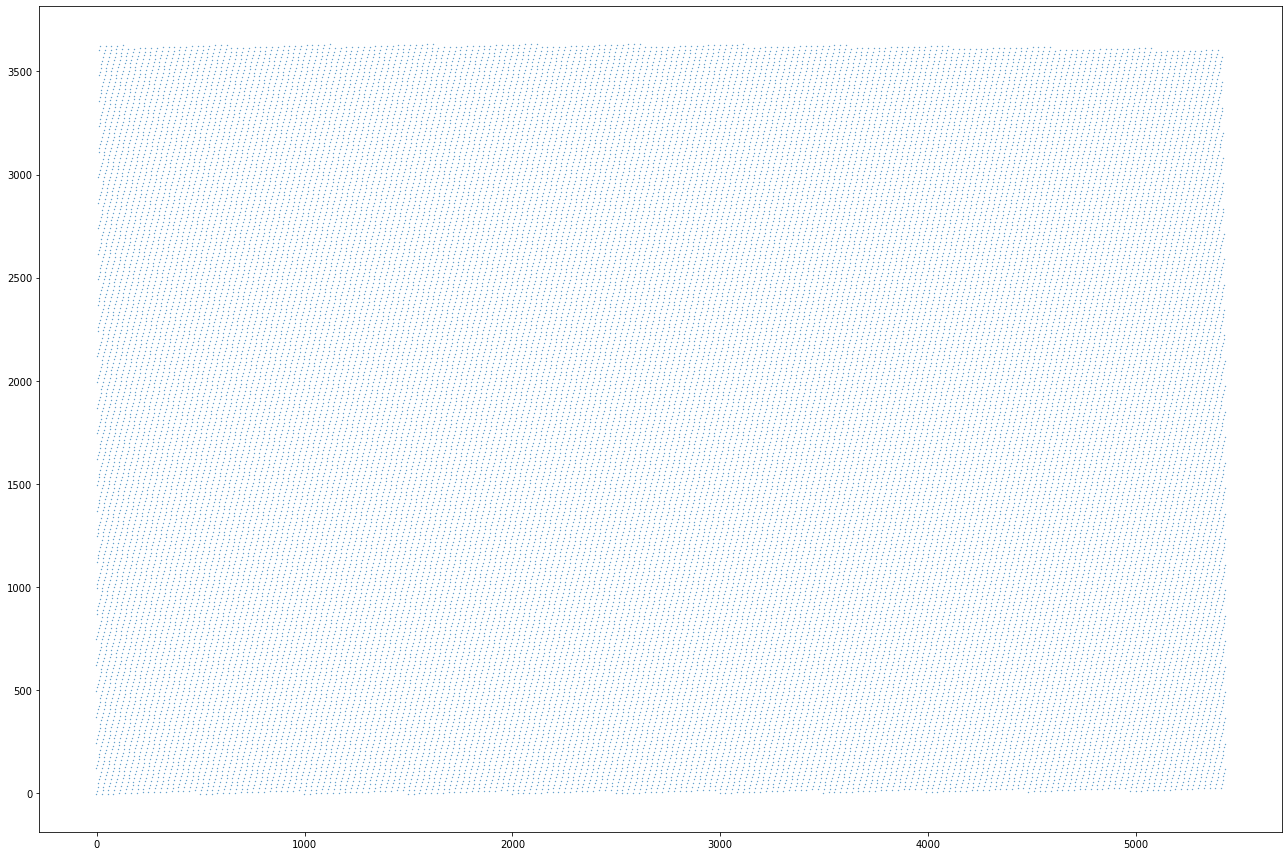

In [55]:
plt.scatter(xc[down_idx], yc[down_idx], s=0.1)
plt.gcf().set_size_inches(18, 12)
plt.tight_layout()

In [57]:
xc[0:20]

array([-4.27412343, -3.2695124 , -2.26491705, -1.26033734, -0.25577324,
        0.7487753 ,  1.75330829,  2.75782579,  3.76232782,  4.76681442,
        5.77128562,  6.77574145,  7.78018196,  8.78460717,  9.78901713,
       10.79341185, 11.79779139, 12.80215577, 13.80650502, 14.81083919])

In [60]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [61]:
find_nearest(xc, 45.56)

(19660931, 45.55996862621896)

In [63]:
xu[19660931]

35

In [64]:
find_nearest(xc, 2500)

(4615397, 2500.0007197128402)

In [65]:
xu[4615397]

2501